In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mall_customers_info = pd.read_csv("data/mall_customers_info.csv")

mall_customers_info.head()

,CustomerID,Gender,Age,Annual_Income
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [3]:
mall_customers_info.shape

(150, 4)

In [4]:
mall_customer_scores = pd.read_csv("data/mall_customers_score.csv")
mall_customer_scores.head()

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40


In [5]:
mall_customer_scores.shape

(150, 2)

In [6]:
customer_data = pd.merge(
    mall_customers_info,
    mall_customer_scores[["CustomerID", "Spending Score (1-100)"]],
    on="CustomerID",
)

In [7]:
customer_data.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
print(customer_data.shape)

(150, 5)


In [9]:
customers_data_2 = pd.read_csv("data/customers_data_2.csv")
customers_data_2.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,151,Male,43,78,17
1,152,Male,39,78,88
2,153,Female,44,78,20
3,154,Female,38,78,76
4,155,Female,47,78,16


In [10]:
customers_data_2.shape

(50, 5)

In [11]:
customers_data_com = pd.concat([customer_data, customers_data_2])
customers_data_com.sample(10)

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
15,16,Male,22,20,79
84,85,Female,21,54,57
103,104,Male,26,62,55
16,17,Female,35,21,35
124,125,Female,23,70,29
50,51,Female,49,42,52
148,149,Female,34,78,22
74,75,Male,59,54,47
33,184,Female,29,98,88
11,162,Female,29,79,83


In [12]:
customers_data_com.reset_index(inplace=True, drop=True)

In [13]:
customers_data_com.shape

(200, 5)

In [14]:
customers_data_com.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual_Income              int64
Spending Score (1-100)     int64
dtype: object

In [15]:
customers_data_com.to_csv("data/combined_customers_data", index=False)

In [16]:
customers_data_com.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income             False
Spending Score (1-100)    False
dtype: bool

In [17]:
customers_data_com.nunique()

CustomerID                200
Gender                      2
Age                        50
Annual_Income              67
Spending Score (1-100)     82
dtype: int64

<AxesSubplot:ylabel='Frequency'>

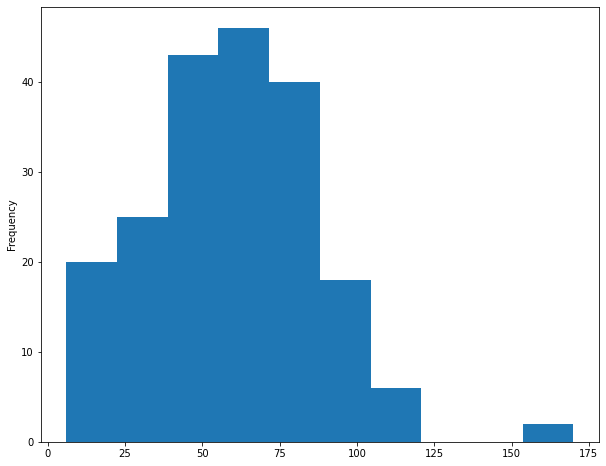

In [18]:
customers_data_com["Annual_Income"].plot.hist(bins=10, figsize=(10, 8))

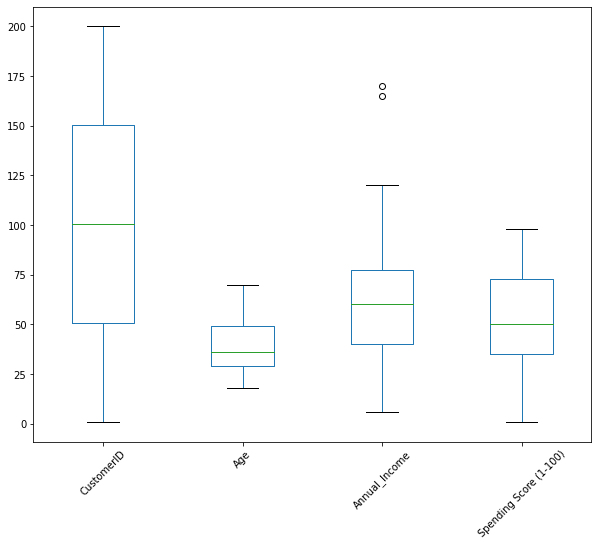

In [19]:
boxplot = customers_data_com.boxplot(grid=False, rot=45, figsize=(10, 8))

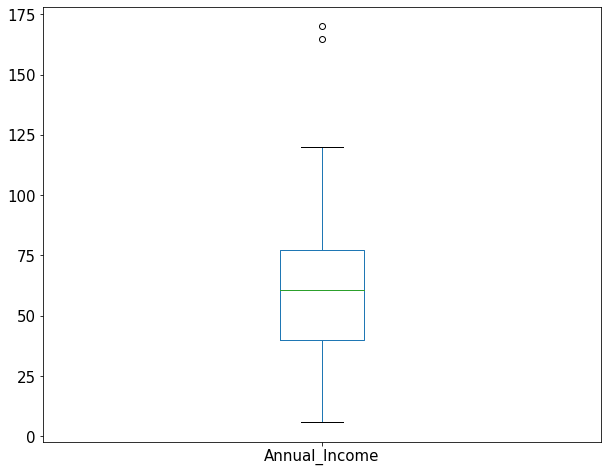

In [20]:
boxplot = customers_data_com.boxplot(
    grid=False, fontsize=15, column=["Annual_Income"], figsize=(10, 8)
)

In [21]:
customers_data_com.loc[customers_data_com["Annual_Income"] > 125]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


In [22]:
Q1 = customers_data_com["Annual_Income"].quantile(0.25)
Q3 = customers_data_com["Annual_Income"].quantile(0.75)

In [23]:
print(Q1, Q3)

40.0 77.25


In [24]:
IQR = Q3 - Q1
print(IQR)

37.25


In [25]:
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR

In [26]:
minimum

-15.875

In [27]:
maximum

133.125

In [28]:
customers_data_com["Annual_Income_Outlier"] = False

In [29]:
for index, row in customers_data_com.iterrows():
    if row["Annual_Income"] > maximum:
        customers_data_com.at[index, "Annual_Income_Outlier"] = True

In [30]:
customers_data_com["Annual_Income_Outlier"].sum()

2

In [31]:
mean = customers_data_com["Annual_Income"].mean()
mean

59.815

In [32]:
for index, row in customers_data_com.iterrows():
    if row["Annual_Income_Outlier"] == True:
        customers_data_com.at[index, "Annual_Income"] = mean

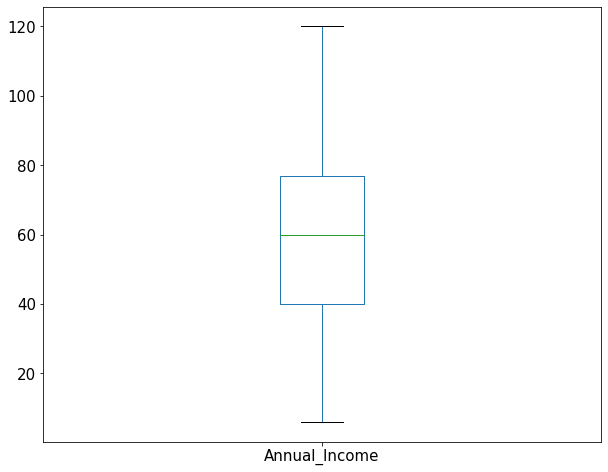

In [33]:
boxplot = customers_data_com.boxplot(
    grid=False, fontsize=15, column=["Annual_Income"], figsize=(10, 8)
)